<a href="https://colab.research.google.com/github/LeanArari/DS-Coderhouse/blob/main/ProyectoDSParteI_Arari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera Entrega Trabajo Final

Estaremos analizando un dataset basado en los "Tickets"/"Solicitudes" generados en "ServiceNow" que recibió el equipo de facturacion de Buenos Aires durante los ultmos 12 meses

En este trabajo contestaremos:



*   ¿Cuantos tickets se abren por mes?
*   ¿Cuantos tickets se abren por oficina?
*   ¿Cuantos tickets son de prioridad Urgente y cuantos Estandar?
*   ¿Cuanto se demora en promedio en resolver un ticket segun su urgencia?
*   ¿Quienes son los analistas que mas tickets resuelven?

Las respuestas obtenidas nos facilitarían la adopción de decisiones fundamentales relacionadas con la distribución del trabajo. Se analizaría si la cantidad de trabajo asignada a cada analista es equitativa, si existen oficinas que necesitan más analistas y si es necesario incorporar nuevo personal.

## Ordenar y limpiar la informacion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
path = "/content/drive/MyDrive/Coder/sn_hr_core_case.csv"
df = pd.read_csv(path, encoding='latin-1')
df.head(10)

,number,opened_at,priority,state,hr_service,u_request_type,assignment_group,assigned_to,assigned_to.location,opened_for,...,assigned_to.1,u_billing_office,u_billing_partner,sys_updated_on,sys_updated_by,closed_at,u_client_group_number,due_date,comments,u_rework_count
0,CASE2981314,03-01-2024 09:54:17,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Gabriele Chyczy,...,Morles Anny Yamilet,Amsterdam,NaN,03-07-2024 10:51:33,gabriele.chyczy@trenchrossi.com,03-07-2024 10:51:33,CGN0213401 Non-Billable Time ? Not Client Related,NaN,03-07-2024 10:27:10 - Morles Anny Yamilet (Add...,0
1,CASE2981315,03-01-2024 09:54:35,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Angelica Santiago,...,Morles Anny Yamilet,Amsterdam,NaN,03-07-2024 16:00:02,system,03-07-2024 16:00:01,CGN0213401 Non-Billable Time ? Not Client Related,NaN,03-01-2024 10:27:24 - Morles Anny Yamilet (Add...,0
2,CASE2981333,03-01-2024 09:59:40,3 - Moderate,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Melanie Derduquez Muller,Buenos Aires Svc. Ctr,Antonella Di Carlo,...,Melanie Derduquez Muller,Juarez,Luis Carbajo,03-04-2024 09:08:28,antonella.dicarlo@bakermckenzie.com,03-04-2024 09:08:28,"CGN0006089 Jabil Circuit, Inc.",NaN,03-04-2024 09:08:28 - Antonella Di Carlo (Addi...,0
3,CASE2981342,03-01-2024 10:05:02,3 - Moderate,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Nickielly Nascimento,...,Morles Anny Yamilet,Amsterdam,NaN,03-07-2024 16:00:01,system,03-07-2024 16:00:01,CGN0213401 Non-Billable Time ? Not Client Related,NaN,03-01-2024 17:52:53 - Morles Anny Yamilet (Add...,0
4,CASE2981351,03-01-2024 10:08:56,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Glaucia Leoncio,...,Morles Anny Yamilet,Global Services Chicago,William Washington,03-08-2024 16:41:01,glaucia.leoncio@trenchrossi.com,03-08-2024 16:00:03,CGN0213401 Non-Billable Time ? Not Client Related,NaN,03-08-2024 16:41:01 - Glaucia Leoncio (Additio...,0
5,CASE2981426,03-01-2024 10:31:43,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Valeria Labate,Buenos Aires Svc. Ctr,Bruna Chaves,...,Valeria Labate,Amsterdam,NaN,03-04-2024 14:15:39,bruna.chaves@trenchrossi.com,03-04-2024 14:15:39,CGN0213401 Non-Billable Time ? Not Client Related,NaN,03-01-2024 12:00:10 - Valeria Labate (Addition...,0
6,CASE2981455,03-01-2024 10:41:00,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Valeria Labate,Buenos Aires Svc. Ctr,Glaucia Leoncio,...,Valeria Labate,Sao Paulo,Clarissa Machado,03-07-2024 16:47:09,glaucia.leoncio@trenchrossi.com,03-07-2024 16:00:02,CGN0037915 Ecolab Inc.,NaN,03-07-2024 16:47:09 - Glaucia Leoncio (Additio...,0
7,CASE2981473,03-01-2024 10:46:21,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Glaucia Leoncio,...,Morles Anny Yamilet,Sao Paulo,Flavia Rebello Pereira,03-07-2024 16:47:05,glaucia.leoncio@trenchrossi.com,03-07-2024 16:00:07,"CGN0000033 Merck & Co., Inc.",NaN,03-07-2024 16:47:05 - Glaucia Leoncio (Additio...,0
8,CASE2981832,03-01-2024 12:25:10,3 - Moderate,Closed Complete,Billing Support,Draft bill,Billing Team - Buenos Aires Center,Giuliana Lacquaniti,Buenos Aires Svc. Ctr,Jake Rubinstein,...,Giuliana Lacquaniti,New York,Maria Eberle,03-07-2024 16:00:05,system,03-07-2024 16:00:05,CGN0273539 Kenvue Inc.,NaN,03-04-2024 09:14:18 - Giuliana Lacquaniti (Add...,0
9,CASE2981839,03-01-2024 12:28:08,3 - Moderate,Closed Complete,Billing Support,Cancel and/or revise final invoice,Billing Team - Buenos Aires Center,Santiago Ottonello,Buenos Aires Svc. Ctr,Ana Buchowsky,...,Santiago Ottonell

In [ ]:
df.columns

Index(['number', 'opened_at', 'priority', 'state', 'hr_service',
       'u_request_type', 'assignment_group', 'assigned_to',
       'assigned_to.location', 'opened_for', 'opened_for.location',
       'opened_for.u_position_type', 'opened_for.title',
       'opened_for.department', 'short_description', 'sys_class_name',
       'assigned_to.1', 'u_billing_office', 'u_billing_partner',
       'sys_updated_on', 'sys_updated_by', 'closed_at',
       'u_client_group_number', 'due_date', 'comments', 'u_rework_count'],
      dtype='object')

In [ ]:
df = df.drop(["u_client_group_number", "comments", "sys_class_name", "opened_for.u_position_type", "sys_updated_on", "opened_for.title", "sys_updated_on", "opened_for.department", "sys_updated_by", "assigned_to.1"], axis=1)
df.head(10)

,number,opened_at,priority,state,hr_service,u_request_type,assignment_group,assigned_to,assigned_to.location,opened_for,opened_for.location,short_description,u_billing_office,u_billing_partner,closed_at,due_date,u_rework_count
0,CASE2981314,03-01-2024 09:54:17,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Gabriele Chyczy,Sao Paulo,transferences,Amsterdam,NaN,03-07-2024 10:51:33,NaN,0
1,CASE2981315,03-01-2024 09:54:35,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Angelica Santiago,Sao Paulo,Time transfers - Matters - Hidrovias do Brasil,Amsterdam,NaN,03-07-2024 16:00:01,NaN,0
2,CASE2981333,03-01-2024 09:59:40,3 - Moderate,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Melanie Derduquez Muller,Buenos Aires Svc. Ctr,Antonella Di Carlo,Buenos Aires Svc. Ctr,Hi Team! Could you please help me to transfer ...,Juarez,Luis Carbajo,03-04-2024 09:08:28,NaN,0
3,CASE2981342,03-01-2024 10:05:02,3 - Moderate,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Nickielly Nascimento,Sao Paulo,Transfer - PPSA,Amsterdam,NaN,03-07-2024 16:00:01,NaN,0
4,CASE2981351,03-01-2024 10:08:56,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Glaucia Leoncio,Sao Paulo,João Gameiro - Transfer of Matters - 51198369 ...,Global Services Chicago,William Washington,03-08-2024 16:00:03,NaN,0
5,CASE2981426,03-01-2024 10:31:43,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Valeria Labate,Buenos Aires Svc. Ctr,Bruna Chaves,Sao Paulo,Transfer times,Amsterdam,NaN,03-04-2024 14:15:39,NaN,0
6,CASE2981455,03-01-2024 10:41:00,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Valeria Labate,Buenos Aires Svc. Ctr,Glaucia Leoncio,Sao Paulo,Beatriz Aranha - Matters Transfer - 50935530 -...,Sao Paulo,Clarissa Machado,03-07-2024 16:00:02,NaN,0
7,CASE2981473,03-01-2024 10:46:21,2 - High,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Glaucia Leoncio,Sao Paulo,Beatriz Aranha - Matters Transfer - 51136718 -...,Sao Paulo,Flavia Rebello Pereira,03-07-2024 16:00:07,NaN,0
8,CASE2981832,03-01-2024 12:25:10,3 - Moderate,Closed Complete,Billing Support,Draft bill,Billing Team - Buenos Aires Center,Giuliana Lacquaniti,Buenos Aires Svc. Ctr,Jake Rubinstein,New York,Kenvue - fix rates on draft 7007357376,New York,Maria Eberle,03-07-2024 16:00:05,NaN,0
9,CASE2981839,03-01-2024 12:28:08,3 - Moderate,Closed Complete,Billing Support,Cancel and/or revise final invoice,Billing Team - Buenos Aires Center,Santiago Ottonello,Buenos Aires Svc. Ctr,Ana Buchowsky,Toronto,"CA11 / ixLegacy Canada Inc. / February 27, 202...",Toronto,Nancy Hamzo,03-05-2024 14:03:27,NaN,1


Quito las columnas que no necesito


In [ ]:
df.shape

(15048, 17)

In [ ]:
valores_unicos_hr = df['hr_service'].unique()
valores_unicos_st = df['state'].unique()

print(valores_unicos_hr)
print(valores_unicos_st)

['Billing Support' 'Voice of Business' 'eBilling Support']
['Closed Complete' 'Cancelled' 'Suspended' 'Awaiting Acceptance'
 'Work in Progress' 'Ready' 'Draft']


In [ ]:
df = df[df['hr_service'] == "Billing Support"]
df.shape

(15035, 17)

Filtro unicamente los tickets abiertos al Billing Team

In [ ]:
column_type = df["closed_at"].dtype
print(column_type)

object


Chequeo dtype de las columnas con fechas

In [ ]:
df['opened_at'] = pd.to_datetime(df['opened_at'], format='%m-%d-%Y %H:%M:%S')
df['due_date'] = pd.to_datetime(df['due_date'], format='%m-%d-%Y %H:%M:%S')
df['closed_at'] = pd.to_datetime(df['closed_at'], format='%m-%d-%Y %H:%M:%S')
df.dtypes

<ipython-input-152-e6cdbc9419ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opened_at'] = pd.to_datetime(df['opened_at'], format='%m-%d-%Y %H:%M:%S')
<ipython-input-152-e6cdbc9419ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['due_date'] = pd.to_datetime(df['due_date'], format='%m-%d-%Y %H:%M:%S')
<ipython-input-152-e6cdbc9419ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,0
number,object
opened_at,datetime64[ns]
priority,object
state,object
hr_service,object
u_request_type,object
assignment_group,object
assigned_to,object
assigned_to.location,object
opened_for,object


Cambio el type a las columnas con fecha para pasarlas de Object a datetime64 (formato Mes/Dia/año - horas/minutos/segundos) y poder trabajar con ellas


In [ ]:
nat_count = df['closed_at'].isna().sum()
print(nat_count)

236


Veo cuantos valores nulos hay en la columna closed_at

In [ ]:
df = df[df['closed_at'].notna()]
df.tail(10)

,number,opened_at,priority,state,hr_service,u_request_type,assignment_group,assigned_to,assigned_to.location,opened_for,opened_for.location,short_description,u_billing_office,u_billing_partner,closed_at,due_date,u_rework_count
14949,CASE4198307,2025-02-26 17:41:18,3 - Moderate,Closed Complete,Billing Support,Cancel and/or revise final invoice,Billing Team - Buenos Aires Center,Mateo Marguery,Buenos Aires Svc. Ctr,Ana Buchowsky,Toronto,"Nors, S.A. November 13, 2024 Invoice 915510350...",Toronto,Nancy Hamzo,2025-02-28 14:07:33,2025-03-03 09:58:21,0
14950,CASE4198315,2025-02-26 17:45:57,3 - Moderate,Closed Complete,Billing Support,Cancel and/or revise final invoice,Billing Team - Buenos Aires Center,Lara Fiorentino,Buenos Aires Svc. Ctr,Ana Buchowsky,Toronto,"Strongco LP November 30, 2024 Invoice 91551040...",Toronto,David Palumbo,2025-02-28 14:13:11,2025-03-03 09:53:38,0
14963,CASE4198520,2025-02-26 19:17:48,2 - High,Closed Complete,Billing Support,Cancel and/or revise final invoice,Billing Team - Buenos Aires Center,Morles Anny Yamilet,Buenos Aires Svc. Ctr,Maria Cardona,Bogota,Anular Factura 9245130225 - Cambio de razón so...,Bogota,Yuliana Salamanca Jaramillo,2025-02-27 17:42:36,2025-02-28 18:11:44,0
14968,CASE4199153,2025-02-26 23:39:05,3 - Moderate,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Felipe Giangrasso,Buenos Aires Svc. Ctr,Carla Moraes,Sao Paulo,Boehringer - Matter transfer,Amsterdam,NaN,2025-02-28 16:54:37,2025-03-03 18:55:19,0
14970,CASE4201839,2025-02-27 10:11:06,3 - Moderate,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Felipe Giangrasso,Buenos Aires Svc. Ctr,Victoria Gonçalves,Sao Paulo,Transfer L. Ambrosio,Sao Paulo,Eduardo Herszkowicz,2025-02-28 12:04:52,2025-03-04 15:58:37,1
14971,CASE4201865,2025-02-27 10:14:52,3 - Moderate,Closed Complete,Billing Support,Cancel and/or revise final invoice,Billing Team - Buenos Aires Center,Leandro Matias Arari,Buenos Aires Svc. Ctr,Alexia Nishimura,Buenos Aires,Malone - Bausch - Cancel and Transfer,Buenos Aires,Bernard Malone,2025-02-28 10:03:12,2025-03-04 15:25:00,0
14981,CASE4202724,2025-02-27 13:31:46,2 - High,Cancelled,Billing Support,Cancel and/or revise final invoice,Billing Team - Buenos Aires Center,Ignacio Ortellado,Buenos Aires Svc. Ctr,Nestor Mendieta,Bogota,Cancel invoice,Bogota,Evelyn Romero Avila,2025-02-28 17:08:21,2025-03-03 15:28:43,0
15034,CASE4207885,2025-02-28 14:25:40,3 - Moderate,Closed Complete,Billing Support,Split/transfer,Billing Team - Buenos Aires Center,Felipe Giangrasso,Buenos Aires Svc. Ctr,Carla Moraes,Sao Paulo,Alibaba - Matter transfer,Amsterdam,NaN,2025-02-28 19:04:27,2025-03-05 12:23:41,0
15044,CASE4208233,2025-02-28 17:30:23,2 - High,Closed Complete,Billing Support,Cancel and/or revise final invoice,Billing Team - Buenos Aires Center,Mateo Marguery,Buenos Aires Svc. Ctr,Muhammad Jamal,Toronto,Cancel and Reissue as per agreed Rates- TR-915...,Toronto,Nancy Hamzo,2025-02-28 18:11:33,2025-03-03 17:32:37,0
15045,CASE4208312,2025-02-28 18:00:33,3 - Moderate,Closed Complete,Billing Support,Interim bill,Billing Team - Buenos Aires Center,Dayanalind Delfin Davila,Buenos Aires Svc. Ctr,Lauren Davis,"Washington, DC",Summer Austin - Request for Interim Invoice - ...,"Washington, DC",Summer Austin,2025-02-28 18:52:29,2025-03-17 18:24:47,0


Filtro mi df para que excluya las filas donde el valor de la columnna closed_at es nulo

In [ ]:
nat_count = df['closed_at'].isna().sum()
nat_count

0

Corroboro que no haya mas valores nulos en dicha columna

In [ ]:
df["resolution_time"] = df["closed_at"] - df["opened_at"]
display (df["resolution_time"])

<ipython-input-156-18645e80089b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["resolution_time"] = df["closed_at"] - df["opened_at"]


,resolution_time
0,6 days 00:57:16
1,6 days 06:05:26
2,2 days 23:08:48
3,6 days 05:54:59
4,7 days 05:51:07
...,...
14971,0 days 23:48:20
14981,1 days 03:36:35
15034,0 days 04:38:47
15044,0 days 00:41:10


Agrego una columna que muestre el tiempo que demoró resolver cada caso

In [ ]:
valores_unicos_ass = df['assigned_to.location'].unique()
print(valores_unicos_ass)

['Buenos Aires Svc. Ctr' nan 'Global Services - Manila']


In [ ]:
df = df[df['assigned_to.location'] == "Buenos Aires Svc. Ctr"]

Filtro por aquellos tickets asignados a analistas de Buenos Aires

In [ ]:
valores_unicos_loc = df['opened_for.location'].unique()
valores_unicos_loc.sort()
valores_unicos_loc

array(['Amsterdam', 'Beijing', 'Bogota', 'Brasília', 'Brisbane',
       'Buenos Aires', 'Buenos Aires Svc. Ctr', 'Cairo', 'Chicago',
       'Dallas', 'Dusseldorf', 'Frankfurt', 'Global Services - Belfast',
       'Global Services - Manila', 'Guadalajara', 'Hanoi',
       'Ho Chi Minh City', 'Hong Kong', 'Houston', 'Johannesburg',
       'Juarez', 'Kuala Lumpur', 'Lima', 'London', 'Los Angeles',
       'Manila', 'Melbourne', 'Mexico City', 'Miami', 'Milan',
       'Monterrey', 'New York', 'Palo Alto', 'Paris', 'Porto Alegre',
       'Rio de Janeiro', 'Riyadh', 'Rome', 'San Francisco', 'Santiago',
       'Sao Paulo', 'Shanghai', 'Singapore', 'Sydney', 'Taipei',
       'Tampa Bus Svc Ctr', 'Tijuana', 'Tokyo', 'Toronto', 'Vienna',
       'Washington, DC', 'Zurich'], dtype=object)

Traigo las variables de la columna opened_for.location para ver desde que oficinas se han abierto tickets

In [ ]:
# Agrupo por region

reemplazos = {
    #Texas
    "Dallas": "Texas",
    "Houston": "Texas",

    # Brasil
    'Sao Paulo': 'Brasil',
    'Brasília': 'Brasil',
    'Rio de Janeiro': 'Brasil',
    'Porto Alegre': 'Brasil',

    # México
    'Mexico City': 'México',
    'Guadalajara': 'México',
    'Monterrey': 'México',
    "Tijuana": "México",
    "Juarez": "México"
}

df['opened_for.location'] = df['opened_for.location'].replace(reemplazos)
valores_unicos_loc = df['opened_for.location'].unique()
valores_unicos_loc.sort()
display(valores_unicos_loc)

array(['Amsterdam', 'Beijing', 'Bogota', 'Brasil', 'Brisbane',
       'Buenos Aires', 'Buenos Aires Svc. Ctr', 'Cairo', 'Chicago',
       'Dusseldorf', 'Frankfurt', 'Global Services - Belfast',
       'Global Services - Manila', 'Hanoi', 'Ho Chi Minh City',
       'Hong Kong', 'Johannesburg', 'Kuala Lumpur', 'Lima', 'London',
       'Los Angeles', 'Manila', 'Melbourne', 'Miami', 'Milan', 'México',
       'New York', 'Palo Alto', 'Paris', 'Riyadh', 'Rome',
       'San Francisco', 'Santiago', 'Shanghai', 'Singapore', 'Sydney',
       'Taipei', 'Tampa Bus Svc Ctr', 'Texas', 'Tokyo', 'Toronto',
       'Vienna', 'Washington, DC', 'Zurich'], dtype=object)

Uso un diccionario para reemplazar valores y unificar ciudades en países

## Visualizacion

In [ ]:
tickets_por_mes_año = df.groupby(df['opened_at'].dt.to_period('M')).size()
tickets_por_mes_año

,0
opened_at,
2024-03,1036
2024-04,1231
2024-05,1370
2024-06,1319
2024-07,1109
2024-08,1234
2024-09,1199
2024-10,1288
2024-11,1223


Agrupo para identificar cuantos tickets se abrieron cada mes

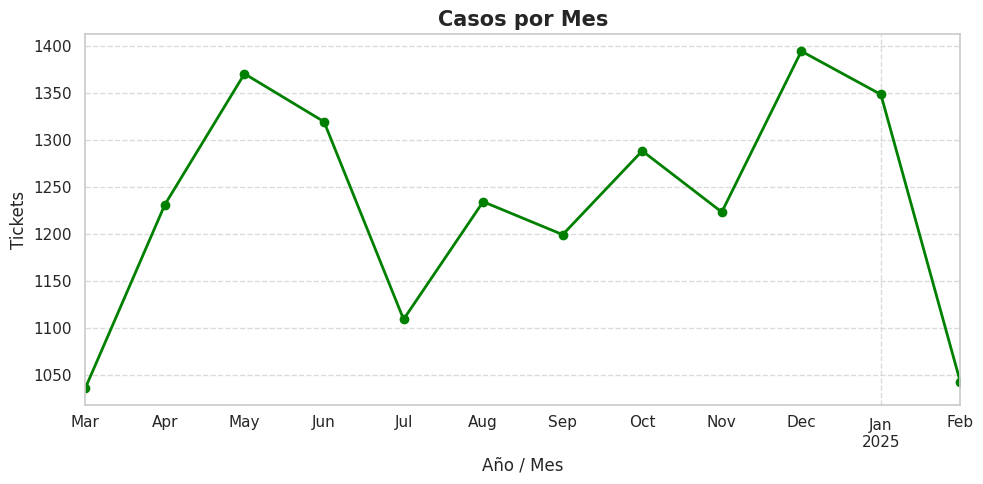

In [ ]:
plt.figure(figsize=(10, 5))
tickets_por_mes_año.plot(kind = "line", marker= "o", color="green", linewidth=2, markersize=6)
plt.title("Casos por Mes", fontweight= "bold", size=15)
plt.xlabel("Año / Mes")
plt.ylabel("Tickets")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Grafico representativo de cuantos tickets se abren por mes que nos deja apreciar los picos producidos en Mayo y Diciembre. La depresion de la muestra en Julio la podemos atribuir al cierre del año fiscal.

In [ ]:
tickets_por_location = df['opened_for.location'].value_counts()
tickets_por_location_10 = tickets_por_location.head(10)
tickets_por_location

,count
opened_for.location,
México,3815
Brasil,3668
Buenos Aires,1763
New York,1335
"Washington, DC",1081
Toronto,922
Texas,700
Bogota,627
Miami,387


Agrupo para identificar cuantos casos se abrieron por oficina

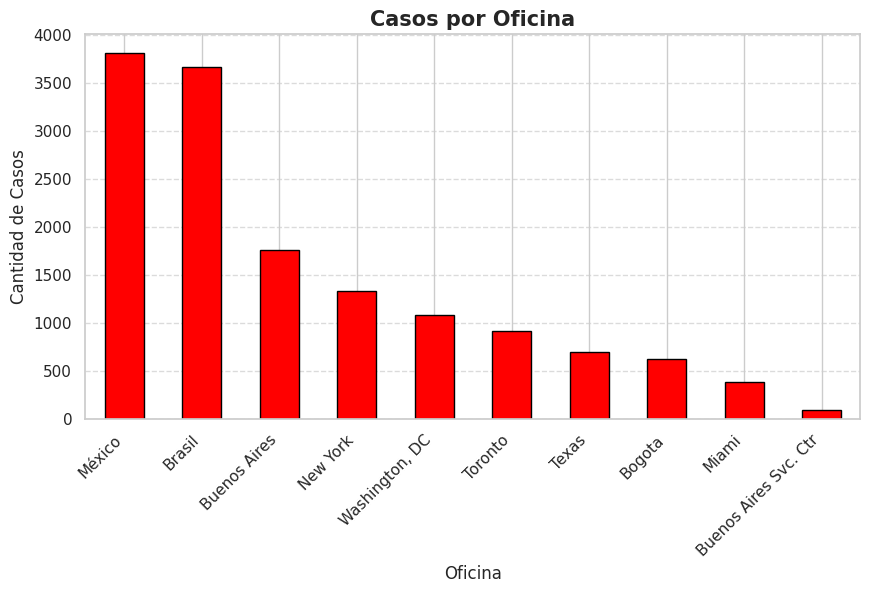

In [ ]:
plt.figure(figsize=(10, 5))
tickets_por_location_10.plot(kind = "bar", color="red", edgecolor= "black")
plt.title("Casos por Oficina", fontweight= "bold", size=15)
plt.xlabel("Oficina")
plt.ylabel("Cantidad de Casos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

Grafico representativo de cuantos tickets se abrieron por oficina tomando como muestra las 10 oficinas con mayor cantidad

In [ ]:
# Cuantos Casos resolvio cada analista
tickets_por_analista = df['assigned_to'].value_counts()
tickets_por_analista_10 = tickets_por_analista.head(10)
tickets_por_analista

,count
assigned_to,
Ignacio Ortellado,1860
Morles Anny Yamilet,1058
Valeria Labate,797
Sofia Barreto,666
Leandro Matias Arari,631
Giuliana Lacquaniti,612
Felipe Carlos Dieleke,549
Antonella Rodio,543
Maria Ayelen Macadar,518


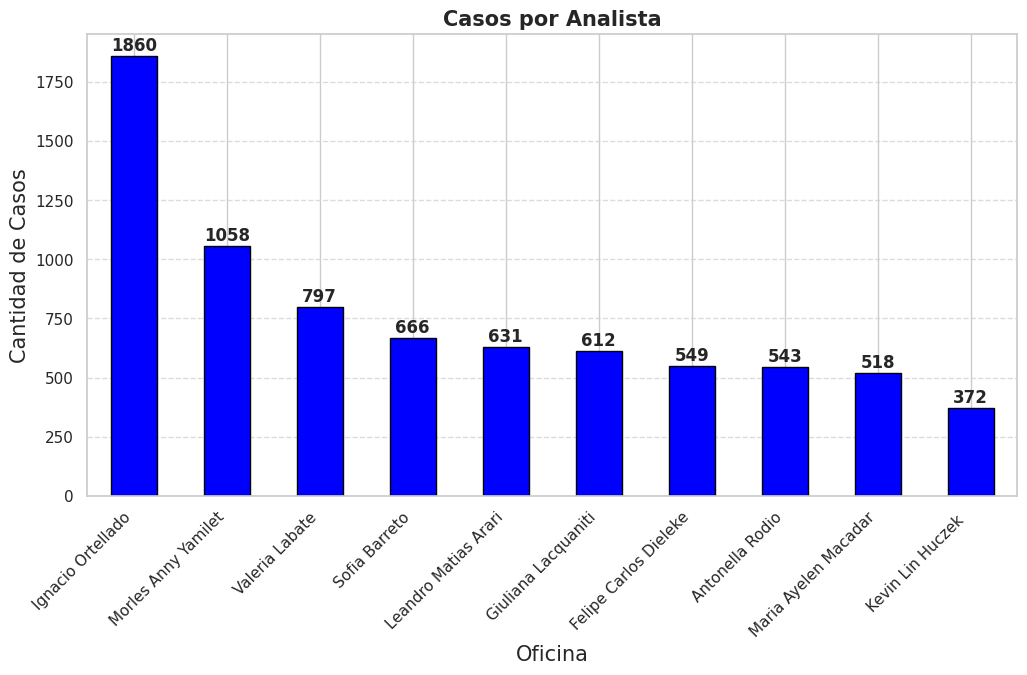

In [ ]:
plt.figure(figsize=(12, 6))
tickets_por_analista_10.plot(kind = "bar", color="blue", edgecolor= "black")
plt.title("Casos por Analista", fontweight= "bold", size=15)
plt.xlabel("Oficina", fontsize= 15)
plt.ylabel("Cantidad de Casos", fontsize= 15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(tickets_por_analista_10):
    plt.text(i, v + 6, str(v), ha='center', va='bottom', fontweight='bold')

Grafico representativo de cuantos tickets resolvió cada analista, tomando como muestra los 10 con mas cantidad

In [ ]:
tickets_por_bp = df['u_billing_partner'].value_counts()
tickets_por_bp

,count
u_billing_partner,
Raymundo Enriquez,408
Reynaldo Vizcarra-Mendez,360
Jorge Ruiz,345
Adolfo Duranona,339
Milton Cheng,279
...,...
Javier Menor,1
Alex Lewis,1
Christian Lopez-Silva,1


Cantidad de tickets abiertos por Billing Partner

In [ ]:
analista_bp = df.groupby(['assigned_to', 'u_billing_partner']).size()
analista_bp.tail(50)

assigned_to                u_billing_partner          
Veronica Artahona          Michael Fitzgerald              3
                           Pamela Church                   1
                           Scott Brandman                  1
                           Simon Beck                      1
                           Terence Gilroy                  3
                           Thomas May                     79
                           Thomas Rice                    18
                           William Roppolo                 1
Victoria LaCapra           Anne Batter                     1
                           Chandri Navarro                 1
                           Fabian Monsalve-Agraz           1
                           Marc Paul                      25
                           Maurice Bellan                  4
                           Reagan Demas                    1
                           Reynaldo Vizcarra-Mendez        1
                           Richard Wells                   1
                           Salim Rahim                     1
                           Thomas Egan, Jr.                1
Victoria Matzkin           Adolfo Duranona                 8
                           Bernard Malone                  2
                           Gabriel Adrian Gomez Giglio     6
                           Guillermo Cervio               17
                           Gustavo Boruchowicz             1
                           Luis Dates                      2
                           Martín Barreiro                 1
                           Roberto Grane                   2
                           Vanina Caniza                   1
Xeuly Ibarra               Luis Carbajo                    1
Yamila Victoria Burchardt  Alan Zoccolillo                 5
                           Angela Vigil                    1
                           Charles Cummings                8
                           Daniela Fonseca Puggina         1
                           Federico Cuadra Del Carmen      1
                           Glenn Woll                      7
                           Imke Gerdes                     1
                           James Blank                    10
                           James Colihan                  25
                           Laura Estrada-Vasquez           1
                           Lindsay LaCava                  1
                           Maria Eberle                    3
                           Oren Livne                      1
                           Pamela Church                  51
                           Paul DePasquale                 1
                           Paul Evans                      1
                           Philip Carmichael              53
                           Robert Moore                    1
                           Simon Beck                     14
                           Steven Canner                   2
                           Terence Gilroy                 11
                           Thomas May                      1
dtype: int64

Resumen que muestra, dentro de la cantidad de casos que tuvo cada analista, a que billing partner correspondia cada cantidad

In [ ]:
df_lean = df[df['assigned_to'] == 'Leandro Matias Arari']
casos_por_locacion = df_lean['u_billing_partner'].value_counts()
print(casos_por_locacion)

u_billing_partner
Adolfo Duranona                293
Bernard Malone                 189
Vanina Caniza                   68
Gustavo Boruchowicz             26
Guillermo Cervio                17
Gabriel Adrian Gomez Giglio     14
Roberto Grane                    7
Luis Dates                       5
Martín Barreiro                  4
Carlos Dodds                     1
Benjamin Allgrove                1
Margaret Michelle Hartmann       1
Name: count, dtype: int64


Resumen como el del punto anterior pero filtrado por analista en particular que deseo buscar

In [ ]:
tickets_por_pri = df['priority'].value_counts()

display(tickets_por_pri)

,count
priority,
3 - Moderate,8896
2 - High,5897


Cantidad de tickets abiertos por prioridad

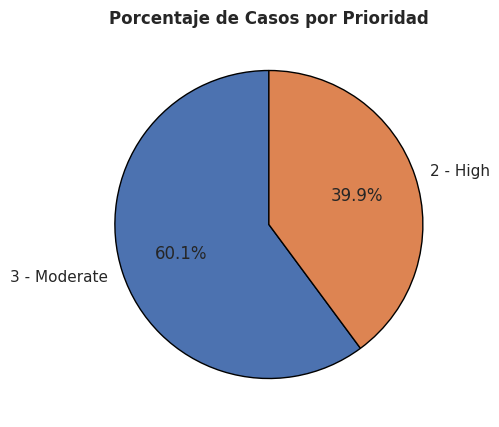

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(tickets_por_pri, labels=tickets_por_pri.index, autopct='%1.1f%%', startangle=90,
        wedgeprops={"edgecolor": "black", "linewidth": 1})
plt.title('Porcentaje de Casos por Prioridad', fontweight= "bold")
plt.show()

Grafico representativo de que porcentaje del total de tickets abiertgos son prioridad "High" y "Moderate"

In [ ]:
resumen_por_priority = df.groupby('priority')['resolution_time'].mean()


display(resumen_por_priority)

,resolution_time
priority,
2 - High,4 days 19:39:40.716974732
3 - Moderate,5 days 02:28:53.908385791


Promedio de cuanto demora en resolverse un ticket acorde a su prioridad


In [ ]:
resumen_por_loc = df.groupby('opened_for.location')['resolution_time'].describe().sort_values(by='mean', ascending=True).head(15)
resumen_por_analyst = df.groupby('assigned_to')['resolution_time'].describe().sort_values(by='mean', ascending=True).head(15)

display(resumen_por_analyst)
display(resumen_por_loc)

,count,mean,std,min,25%,50%,75%,max
assigned_to,,,,,,,,
Beatriz Mejias,1,0 days 01:21:56,NaT,0 days 01:21:56,0 days 01:21:56,0 days 01:21:56,0 days 01:21:56,0 days 01:21:56
Ligeanie Mendes,5,1 days 09:25:18.200000,2 days 05:05:41.698785743,0 days 00:20:52,0 days 01:36:53,0 days 09:14:17,1 days 05:53:37,5 days 06:00:52
Leandro Matias Arari,631,2 days 18:27:33.369255150,3 days 04:24:11.035227378,0 days 00:29:36,0 days 22:07:31.500000,1 days 20:21:24,3 days 23:35:26,48 days 23:45:13
Giuliana Lacquaniti,612,3 days 01:34:43.506535947,2 days 22:05:28.868939264,0 days 00:10:44,0 days 20:54:01.250000,2 days 00:14:04.500000,5 days 03:36:41,28 days 10:06:22
Julieta Gravagno,202,3 days 04:54:31.539603960,3 days 00:59:11.121317801,0 days 00:20:56,0 days 16:14:56.500000,1 days 22:18:29.500000,6 days 03:01:53.500000,16 days 03:00:26
Florencia Torres,285,3 days 07:54:25.171929824,3 days 03:10:58.679713331,0 days 01:00:01,0 days 23:33:51,1 days 22:35:15,6 days 00:48:36,21 days 02:34:26
Maria Ayelen Macadar,518,3 days 08:25:27.523166023,3 days 09:21:09.276789243,0 days 00:39:05,0 days 23:17:57.250000,2 days 18:08:40.500000,5 days 01:20:17,38 days 01:03:31
Ezequiel Fernando Gomez,227,3 days 08:57:17.303964757,3 days 12:29:08.482129388,0 days 00:09:45,0 days 20:41:46.500000,1 days 20:56:04,6 days 02:58:14.500000,27 days 03:34:08
Santiago Ottonello,210,3 days 12:24:29.852380952,5 days 03:31:30.207233346,0 days 00:22:51,0 days 05:18:06.500000,1 days 21:37:02.500000,6 days 03:15:06.250000,63 days 03:40:24


,count,mean,std,min,25%,50%,75%,max
opened_for.location,,,,,,,,
Paris,1,0 days 06:31:34,NaT,0 days 06:31:34,0 days 06:31:34,0 days 06:31:34,0 days 06:31:34,0 days 06:31:34
Cairo,1,0 days 06:40:44,NaT,0 days 06:40:44,0 days 06:40:44,0 days 06:40:44,0 days 06:40:44,0 days 06:40:44
Amsterdam,5,0 days 07:31:48.600000,0 days 07:42:40.372139076,0 days 01:31:05,0 days 03:44:25,0 days 05:22:22,0 days 06:03:15,0 days 20:57:56
Rome,2,0 days 23:01:16.500000,1 days 00:40:16.147250936,0 days 05:34:34,0 days 14:17:55.250000,0 days 23:01:16.500000,1 days 07:44:37.750000,1 days 16:27:59
Zurich,1,1 days 19:07:08,NaT,1 days 19:07:08,1 days 19:07:08,1 days 19:07:08,1 days 19:07:08,1 days 19:07:08
Milan,2,2 days 03:31:31,1 days 04:39:52.335219240,1 days 07:15:23,1 days 17:23:27,2 days 03:31:31,2 days 13:39:35,2 days 23:47:39
Buenos Aires,1763,2 days 23:00:36.950085082,3 days 01:36:14.506997309,0 days 00:10:44,0 days 22:10:09.500000,1 days 23:14:15,4 days 06:10:45.500000,48 days 23:45:13
Toronto,922,3 days 03:15:24.724511930,3 days 16:56:25.584684539,0 days 00:09:45,0 days 19:15:46.250000,1 days 19:21:54.500000,6 days 00:33:43.750000,63 days 03:40:24
Tokyo,10,3 days 08:00:01.300000,2 days 03:11:57.714692773,1 days 00:13:41,1 days 09:31:47,2 days 23:08:18,4 days 12:56:09.750000,6 days 16:08:27


Resumen con diversas estadisticas, ordenado de manera ascendente por aquellos  analistas que en promedio demoran menos tiempo en resolver sus tickets.

Mismo tipo de resumen debajo con oficinas.

In [ ]:
print(df['resolution_time'].describe())

count                        14793
mean     4 days 23:45:46.159467315
std      4 days 03:06:11.104002350
min                0 days 00:09:45
25%                1 days 18:51:21
50%                6 days 00:14:59
75%                6 days 22:35:48
max              118 days 07:21:38
Name: resolution_time, dtype: object


In [ ]:
promedio_por_tipo = df.groupby('u_request_type')['resolution_time'].mean()
promedio_por_tipo = promedio_por_tipo.sort_values(ascending=False)
cantidad_reqtype= df['u_request_type'].value_counts().sort_values(ascending=False)

display(promedio_por_tipo)
display(cantidad_reqtype)

,resolution_time
u_request_type,
WIP report,6 days 05:46:43.217391304
Other billing Request,5 days 15:03:24.621581450
Cancel and/or revise final invoice,5 days 01:32:14.082933844
Draft bill,4 days 18:19:29.590676883
Split/transfer,4 days 16:18:02.930585683
Interim bill,4 days 11:55:34.474719101
Credit memo creation,4 days 09:31:20.243386243
Mass WIP write off,4 days 06:38:30.862745098


,count
u_request_type,
Cancel and/or revise final invoice,4172
Split/transfer,4149
Other billing Request,3364
Draft bill,1566
Credit memo creation,756
Interim bill,712
Mass WIP write off,51
WIP report,23


Cuantos casos hay de cada categoria y cuanto tarda en promedio en resolverse


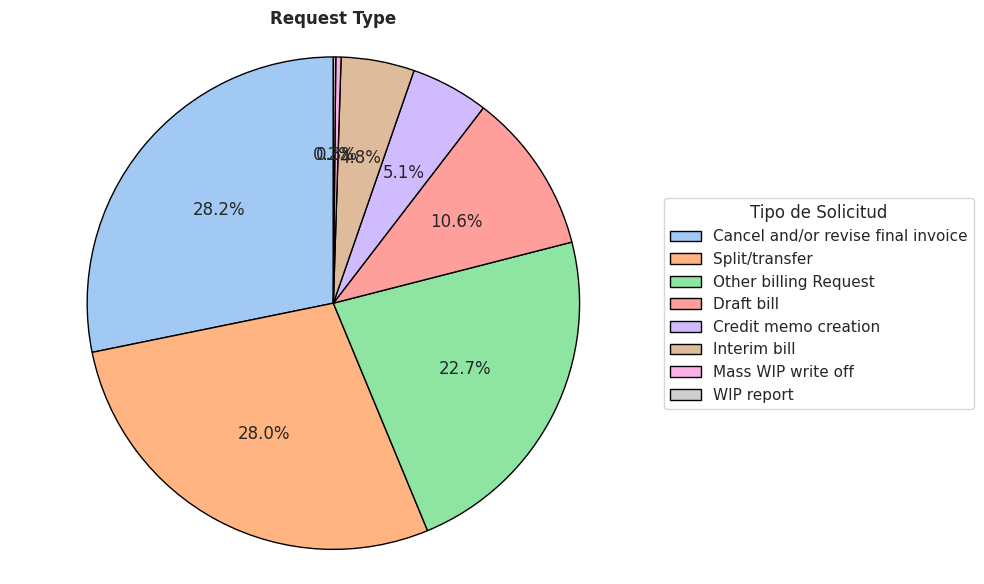

In [ ]:
sns.set(style= "whitegrid")
plt.figure(figsize=(10, 6))
plt.pie(cantidad_reqtype, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("pastel"), wedgeprops={"edgecolor": "black", "linewidth": 1})
plt.title('Request Type', fontweight= "bold")
plt.axis('equal')
plt.legend(cantidad_reqtype.index, title="Tipo de Solicitud", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()